# Assignment 3: Model selection and regularization
## BUS 20800: Big Data
## Due: Jan 29, 2024 before class

Dario and Alberto worked on Problem 1.1 and 1.2. Shivani worked on 1.3. Alberto worked on Problem 2. Shivani and Monica worked on Problem 3.

----

## Problem 1. **Ridge Regression and Correlation Screening**

**1. Ridge and OLS**

Show that the ridge regression estimates can be obtained by OLS on an augmented data set. We augment the centered matrix $X$ with $p$ additional rows $\sqrt{\lambda}I$, and augment $y$ with $p$ zeros. By introducing artificial data with response value being zero, the fitting procedure is forced to shrink the coefficients toward zero. 

**Answer** :
After the data augmentation, the equation would look as follows:

$$
\underset{\substack{(n+p) \ \times \ 1}}{
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \\
    0 \\
    \vdots \\
    0 \\
\end{bmatrix}} =
\underset{\substack{(n+p) \ \times \ p}}{
\begin{bmatrix}
    1 & x_{11} & \ldots & x_{1p} \\
    1 & x_{21} & \ldots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & \ldots & x_{np} \\
    \sqrt{\lambda} & 0 & \ldots & 0 \\
    0 & \sqrt{\lambda} & \ldots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \ldots & \sqrt{\lambda} \\
\end{bmatrix}}
\cdot
\underset{\substack{p \ \times \ 1}}{
\begin{bmatrix}
    \beta_0 \\
    \beta_1 \\
    \vdots \\
    \beta_p \\
\end{bmatrix}} \ + \
\underset{\substack{(n+p) \ \times \ 1}}{
\begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n \\
    \epsilon_{n+1} \\
    \vdots \\
    \epsilon_{n+p} \\
\end{bmatrix}}
$$

Therefore, we are looking for the parameter vector $\hat{\beta}_{AugOLS}$ that minimizes $||Y^A - X^A \beta||^2$, where $X^A$ and $Y^A$ are the matrices resulting from augmenting $X$ and $Y$ in the specified way. Then:

$$
\begin{align}
\hat{\beta}_{AugOLS} &= min _{\beta}||Y^A - X^A \beta||^2 \\
&= min {\beta} \left( \sum{i=1}^{n+p} \left[ y^A_i - \left( \beta_0 + \beta_1x^A_{i1} + \ldots + \beta_px^A_{ip} \right) \right]^2 \right) \\
&= min {\beta} \left( \sum{i=1}^{n} \left[ y^A_i - \left( \beta_0 + \beta_1x^A_{i1} + \ldots + \beta_px^A_{ip} \right) \right]^2 +
\sum_{i=n+1}^{n+p} \left[ y^A_i - \left( \beta_0 + \beta_1x^A_{i1} + \ldots + \beta_px^A_{ip} \right) \right]^2 \right) \\
&= min {\beta} \left( ||Y-X\beta||^2 + \sum{i=n+1}^{n+p} \left[ 0 - \sqrt{\lambda}\beta_{i-n} \right]^2 \right) \\
&= min {\beta} \left( ||Y-X\beta||^2 + \sum{i=n+1}^{n+p} \lambda \beta_i ^2 \right) \\
&= min {\beta} \left( ||Y-X\beta||^2 + \lambda \sum{j=1}^{p}  \beta_j ^2 \right) \\
&= min _{\beta} \left( ||Y-X\beta||^2 + \lambda ||\beta||^2 \right) \\
&= \hat{\beta}_{ridge}
\end{align} 
$$




**2. Analytical formula for Ridge**

Show that for the ridge problem

$$\hat{\beta}_{ridge} = argmin _{\beta}||Y-X\beta||^2_2 +\lambda ||\beta||_2^2
$$

has the closed form:

$$
\hat{\beta}_{ridge} = (X^TX+\lambda I_d)^{-1}X^TY
$$

where $I_d$ is the identity matrix.


**Answer**:
To find the minimum of this objective function with respect to $\beta$, we take its derivative and set it to zero using the chain rule, then solve for $\beta$.


We start by expanding the objective function:

$$
\begin{equation}
    ||Y - X\beta||^2_2 + \lambda ||\beta||^2_2 = (Y - X\beta)^T(Y - X\beta) + \lambda \beta^T\beta
\end{equation}
$$


Then, taking the derivative with respect to $\beta$ and setting it to zero gives:

$$
\begin{equation}
    \frac{\partial}{\partial \beta} \left[ (Y - X\beta)^T(Y - X\beta) + \lambda \beta^T\beta \right] = 0
\end{equation}
$$

Applying the derivative, we get:

$
\begin{equation}
    -2X^T(Y - X\beta) + 2\lambda \beta = 0
\end{equation}
$

Rearranging the terms to solve for $\beta$, we obtain:

$
\begin{equation}
    X^T(Y - X\beta) = \lambda \beta
\end{equation}
$

\begin{equation}
    X^TY - X^TX\beta = \lambda \beta
\end{equation}

Adding $X^TX\beta$ to both sides and factoring out $\beta$ yields:

\begin{equation}
    X^TY = (X^TX + \lambda I)\beta
\end{equation}

Finally, solving for $\beta$ gives us the closed-form solution:

\begin{equation}
    \hat{\beta}_{ridge} = (X^TX + \lambda I_d)^{-1}X^TY
\end{equation}


**3. Ridge and Correlation Screening**

Consider a linear regression model $Y=X\beta+\varepsilon$, where $y$ is the $n × 1$ response vector, $X$ is the $n × p$ design matrix, $\beta$ is the $p × 1$ regression coefficient vector, and $\varepsilon$ is the $n×1$ random error vector with $E(\varepsilon) = 0$ and $Cov(ε) = \sigma^2 I_{d}$.

Assume each column of $X$ has zero mean and unit variance.

Use results of 1.2 to show that when $\lambda → \infty$, ridge regression outputs are exactly the correlations used in screening.



**Answer**:


\begin{equation}
    \hat{\beta}_{ridge} = (X^TX + \lambda I_d)^{-1}X^TY
\end{equation}

As $\lambda\rightarrow\infty$, $\lambda I_{d}\rightarrow\infty$ and the value $X^TX$ becomes insignificant relative to the large $\lambda I_{d}$ value. Therefore,

\begin{equation}
    \hat{\beta}_{ridge\lambda\rightarrow\infty} \approx (\lambda I_d)^{-1}X^TY
    = \dfrac{1}{\lambda}X^TY
\end{equation}


The formula for the correlations used in screening, specifically in the context of a regression model, is based on the Pearson correlation coefficient between each predictor variable $X_{i}$ (where $i$ is the index for the predictors, ranging from 1 to $p$) and the response variable $Y$. The Pearson correlation coefficient between the $i$-th predictor $X_{i}$ and the response $Y$ is calculated as follows:

$$
\rho_{X_i,Y} = \frac{cov(X_i, Y)}{\sigma_{X_i} \sigma_Y}
$$

However, given the assumption in your question that each column of $X$ has zero mean and unit variance, the formula simplifies. Since the variance $\sigma_{X_i}^2$ of each predictor is 1, and the covariance $cov(X_i, Y)$ is simply the dot product of $X_{i}$ with $Y$ divided by the number of observations $n$ (assuming mean-centered data), the formula for the correlation used in screening becomes:

$$
\rho_{X_i,Y} = \frac{1}{n} \sum_{k=1}^{n} (X_{ki} \cdot Y_k)
$$

where $X_{ki}$ is the value of the $i$-th predictor for the $k$-th observation, and $Y_k$ is the $k$-th observation of the response variable. In matrix notation, considering all predictors at once, the correlations between all predictors in $X$ and the response $Y$ can be represented compactly as:

$$
\rho_{X,Y} = \frac{1}{n} X^T Y
$$

As we can see, when we set $\lambda=n$, $\rho_{X,Y}=\hat{\beta}_{ridge}$. Therefore we can conclude that as $\lambda → \infty$, ridge regression outputs become exactly the correlations used in screening.


-----

In [1]:
# Setup codes

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
from scipy.io import loadmat
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

----

## Problem 2. Sparse Signal Recovery

In this exercise, we will generate a simulated linear regression problem and use different feature selection techniques to see if these methods can recover the sparse signals.


### Part 1. Data Generating Process

In [2]:
# DGP, you don't need to modify any codes here

n_samples, n_features = 50, 100
num_signal = 10
X = np.random.randn(n_samples, n_features)

# Construct the signals
idx = np.arange(n_features)

coef = 5 * np.random.randn(n_features)
inds = np.arange(n_features)

# Shuffle index and sparsify the signals
np.random.shuffle(inds)
coef[inds[num_signal:]] = 0

# Add noise
y = np.dot(X, coef) + 0.01 * np.random.normal(size=n_samples)

### Part 2. Fit Lasso and Elastic Net

In [3]:
# Split data in training set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.4)
print(X_train)

[[ 0.6314441  -3.11221886  0.37749577 ...  0.05678802  0.07349582
   0.52545513]
 [-0.58072017 -0.82307437 -0.31034869 ... -2.36780358  0.66074823
   0.17835355]
 [ 0.05809894 -2.62008833 -1.64376978 ... -0.54579306  0.45166948
  -1.12794136]
 ...
 [ 0.14590057 -0.64125915 -1.15110406 ... -1.57500555  1.48308388
  -0.71894923]
 [ 1.49667681  0.18799989  0.87632169 ...  0.97350351 -0.39307334
   0.71257905]
 [ 0.43268991 -0.2655554  -2.09204412 ...  0.14698819  0.65445073
  -1.17639267]]


+ Fit Lasso (variable name lasso) and Elastic Net (variable name enet) and get the OOS R^2

In [172]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0)
l1_ratio = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

lasso = LassoCV(cv=cv, alphas=alphas, random_state=0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

enet = ElasticNetCV(cv=cv, l1_ratio=l1_ratio, random_state=0, alphas=alphas)
enet.fit(X_train, y_train)
enet_pred = enet.predict(X_test)

r2_score_enet = r2_score(y_test, enet_pred)
r2_score_lasso = r2_score(y_test, lasso_pred)

print("Optimal alpha for Lasso: %f" % lasso.alpha_)
print("r^2 on test data, Lasso : %f" % r2_score_lasso)
print("Optimal alpha for Elastic Net: %f" % enet.alpha_)
print("Optimal l1_ratio for Elastic Net: %f" % enet.l1_ratio_)
print("r^2 on test data, Elastic Net : %f" % r2_score_enet)

Optimal alpha for Lasso: 0.000010
r^2 on test data, Lasso : 0.065713
Optimal alpha for Elastic Net: 0.001000
Optimal l1_ratio for Elastic Net: 0.000000
r^2 on test data, Elastic Net : 0.043788


----

## Problem 3. **Forecasting GDP Growth**

**Background**:

In this exercise, you are provided with the dataset FredMDlargeHor1.mat, which comprises an index of GDP growth along with a range of macroeconomic predictors. The primary objective is to analyze this dataset to understand the impact of these predictors on GDP growth.

You are encouraged to employ the lasso path method for estimating Lasso models across various alpha values. For the purpose of comparison with Ridge regression, we implement a loop over these alpha values.

In [22]:
# load data
Macro1 = pd.read_csv('FredMDlargeHor1.csv')
X = Macro1.drop('Y', axis=1)
y = Macro1['Y']
X

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST
0,0.003226,0.004661,0.002791,0.016963,0.026606,0.025917,0.024095,0.029021,0.031235,0.103831,...,-0.001751,-0.002588,-0.001845,-0.001246,-0.004680,0.007797,-0.009705,0.004292,-0.011739,-0.013330
1,0.001147,0.000906,0.004361,0.014403,0.003696,-0.008939,-0.005685,-0.003435,-0.011457,-0.013855,...,0.001620,0.003750,0.001683,0.000858,-0.004555,0.003853,-0.004750,0.008268,0.005388,-0.018942
2,0.001877,0.000905,0.014089,-0.028040,-0.001102,-0.009019,-0.003427,-0.001150,0.001153,-0.019965,...,-0.000454,-0.004537,0.001791,-0.001146,-0.000020,0.030131,-0.004684,0.003472,0.000951,0.003490
3,0.003465,0.003612,0.015302,0.009853,0.025903,-0.007959,0.002290,0.001150,0.006880,-0.001189,...,0.003036,0.004115,0.004424,0.001523,-0.008949,-0.068074,0.000000,0.008678,0.005452,0.024136
4,0.002405,0.002427,-0.020351,-0.031518,-0.015047,-0.001143,0.005688,0.006862,0.005699,0.009455,...,-0.002587,-0.001304,-0.006700,0.000565,0.008949,0.041620,0.000000,-0.004827,-0.002067,0.003798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,0.005745,0.003246,-0.002191,0.004620,-0.014940,0.006146,0.010062,0.011250,0.006137,0.022365,...,-0.000236,-0.008968,0.000830,0.001072,-0.000024,0.000633,-0.002135,-0.195565,-0.231734,-0.006132
739,-0.001805,-0.000659,0.005335,-0.001765,0.008559,0.000024,0.000152,-0.002031,-0.002834,-0.014554,...,-0.000615,0.005791,0.000910,-0.002294,0.000351,-0.001330,0.001643,0.001620,0.000501,0.002061
740,-0.010625,0.002091,0.002447,0.006098,0.007172,-0.010685,-0.005036,-0.007066,-0.007365,-0.036534,...,-0.000962,-0.009590,-0.000145,0.000342,-0.001145,-0.003592,-0.003765,0.007719,0.002096,0.005011
741,0.000665,0.003385,0.006544,0.003308,0.015885,0.012471,0.005402,0.005488,0.004588,0.042117,...,0.003207,0.012591,0.005020,0.000863,-0.002247,0.006491,-0.000006,-0.011586,-0.006708,0.006921


In [23]:
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Part 1: Hyperparameter Tuning and Ridge Regression

+ In this part, you are asked to choice your own range of hyperparamters. For your choice of hyperparamters, fit Ridge regression using training data and compute MSE for the fitted Ridge model using test data. Plot MSE to see whether your tuning range is good and which hyperparameter is best among your tuning range.

In [155]:
# choose your tuning range alphas
MSEs = []
# your code here
alphas = [x/100.0 for x in range(12,100)]
#alphas = 2**(np.linspace(-3,1,50))

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    MSE = mean_squared_error(y_test, y_pred)
    MSEs.append(MSE)

+ Which alpha is optimal for Ridge regression? And what is the corresponding MSE?
<p></p>
The optimal alpha value is around 0.45 which results in a mean square error of 0.000148. Any range below 0.12 will send the alpha to 0 which will result in an even small MSE but it will do so through overfiting the data.

In [158]:
# you don't need to modify any codes here
min_MSE_index = MSEs.index(min(MSEs))
optimal_alpha = alphas[min_MSE_index]
min_MSE = MSEs[min_MSE_index]

print("Optimal alpha:", optimal_alpha)
print(f'MSE: {min_MSE}')

Optimal alpha: 0.45
MSE: 0.00014671585114229633


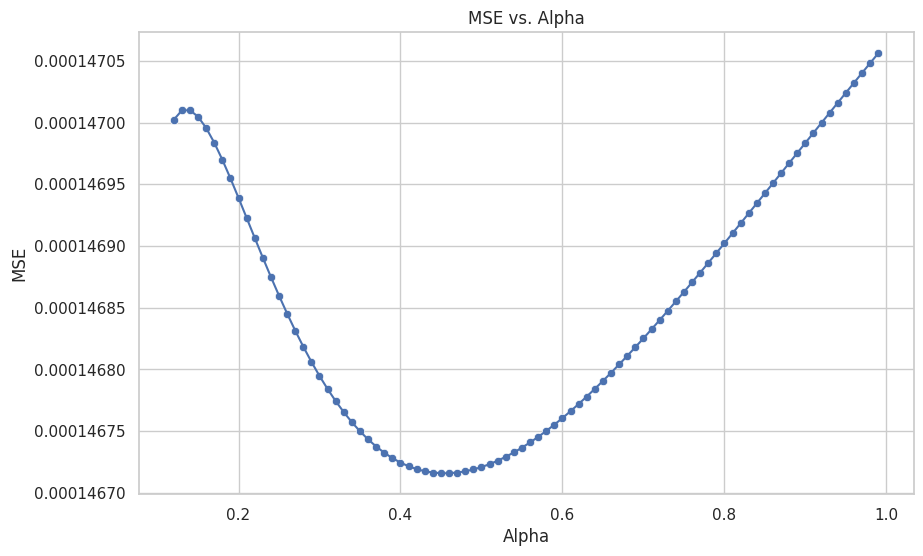

In [159]:
# Visualization
plt.figure(figsize=(10, 6))
# your code here, plot MSE vs Alpha
sns.scatterplot(x=alphas, y=MSEs)
plt.plot(alphas, MSEs)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.grid(True)
plt.show()

### Part 2: Hyperparameter Tuning and Ridge Regression

+ In this part, you are asked to choice your own range of hyperparamters. For your choice of hyperparamters, fit Lasso regression using training data and compute MSE for the fitted Lasso model using test data. Plot MSE to see whether your tuning range is good and which hyperparameter is best among your tuning range.

In [169]:
# choose your tuning range alphas
MSEs = []
# your code here
alphas = 2**(np.linspace(-9, -7, 50))

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    MSE = mean_squared_error(y_test, y_pred)
    MSEs.append(MSE)

+ Which alpha is optimal for Lasso regression? And what is the corresponding MSE?

In [170]:
# you don't need to modify any codes here
min_MSE_index = MSEs.index(min(MSEs))
optimal_alpha = alphas[min_MSE_index]
min_MSE = MSEs[min_MSE_index]

print("Optimal alpha:", optimal_alpha)
print(f'MSE: {min_MSE}')

Optimal alpha: 0.00266616095233593
MSE: 6.38034776039502e-05


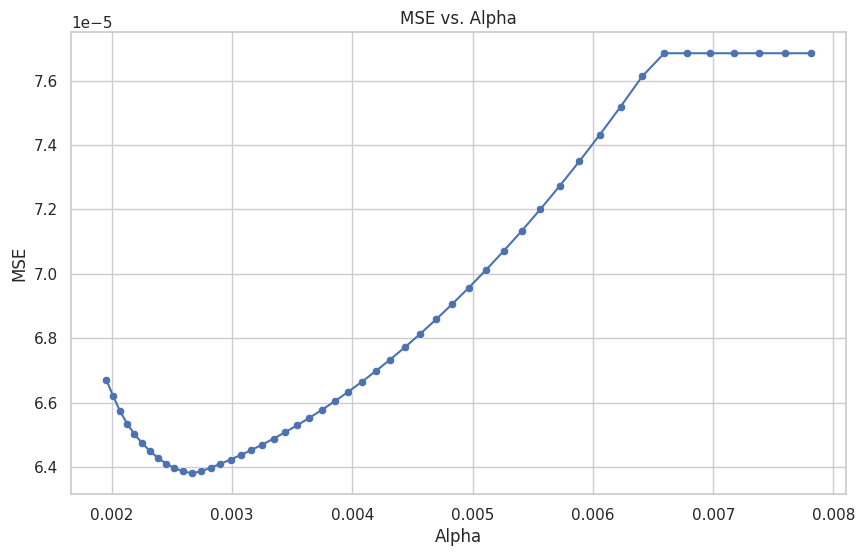

In [171]:
# Visualization
plt.figure(figsize=(10, 6))
# your code here, plot MSE vs Alpha
sns.scatterplot(x=alphas, y=MSEs)
plt.plot(alphas, MSEs)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.grid(True)
plt.show()